Assignment 4
1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1  import necessary libraries

In [25]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as stats
import numpy as np


#  2 import data

In [26]:
delivary_data=pd.read_csv("delivery_time.csv")

In [27]:
delivary_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3 data understanding

### 3.1 initial analysis

In [28]:
delivary_data.shape

(21, 2)

In [29]:
delivary_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [30]:
delivary_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### 3.2 perform assumption check

##### 3.2.1 liniarity check

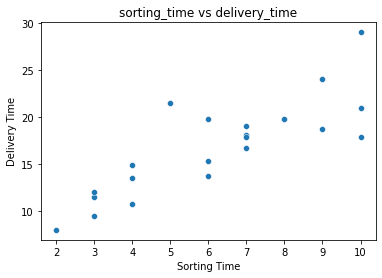

In [31]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=delivary_data)
plt.title("sorting_time vs delivery_time")
plt.show()

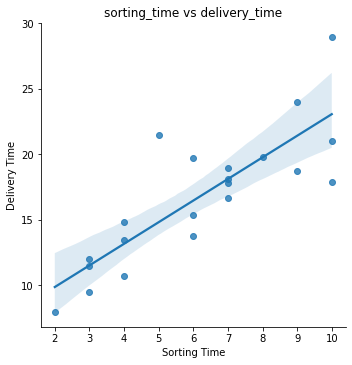

In [32]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivary_data)
plt.title("sorting_time vs delivery_time")
plt.show()          

As displayed in the scatter plot, the data does contains some outliers, but there is potive correlation between delivery time and sorting Time

In [33]:
delivary_data.corr().round(2)

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


The correlation between delivery time and sorting Time is high (83%)

##### 3.2.2normality check

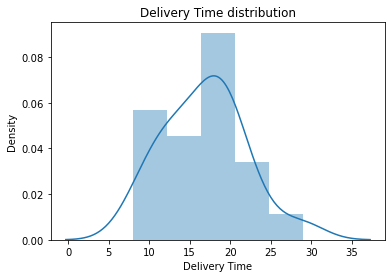

In [34]:
sns.distplot(a=delivary_data['Delivery Time'])
plt.title("Delivery Time distribution")
plt.show()

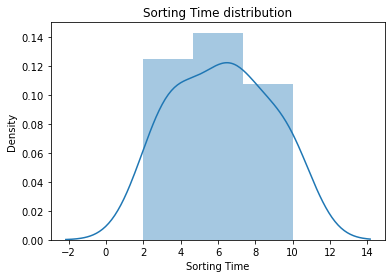

In [35]:
sns.distplot(a=delivary_data['Sorting Time'])
plt.title("Sorting Time distribution")
plt.show()

normality check also failed

## 4. Data Preparation & 5 . Model Building & Training

For linear regression, we use 2 libraries

statsmodels - ols technique (Ordinary Least Square technique) 2.sklearn - LinearRegression

In [36]:
delivary_data.rename(columns={'Sorting Time':'ST','Delivery Time':'DT'},inplace=True)

In [37]:
import statsmodels.formula.api as smf

In [38]:
lin_reg_model=smf.ols(formula="DT~ST",data=delivary_data).fit() ##OLS-ordinary least squares
lin_reg_model

# 7. Model Testing

In [39]:
lin_reg_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [40]:
lin_reg_model.tvalues,lin_reg_model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [41]:
lin_reg_model.rsquared,lin_reg_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [42]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        17:38:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.1. Model Prediction

 7.1.1 No transformation

In [43]:
predictions=lin_reg_model.predict(delivary_data['ST'])

In [44]:
predictions

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

### Transformation Techniques

In [45]:
def diagnostic_plot(df,variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### log transformation

In [46]:
delivary_data['log_ST']=np.log(delivary_data["ST"]+1)

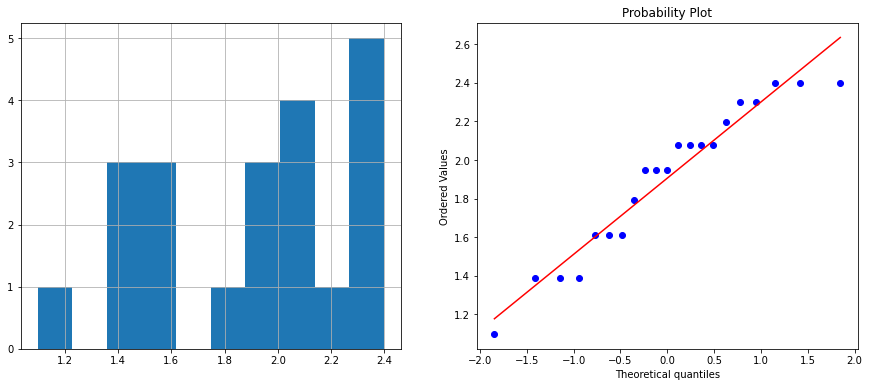

In [47]:
diagnostic_plot(delivary_data,"log_ST")

The logarithmic distribution not done a good job in making Sorting Time variable look Gaussian Distributed

In [48]:
lin_reg_model1=smf.ols(formula="DT~log_ST",data=delivary_data).fit()

In [49]:
lin_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.51e-06
Time:                        17:38:26   Log-Likelihood:                -50.857
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0990      3.221     -1.273      0.218     -10.840       2.642
log_ST        10.9592      1.658      6.612      0.000       7.490      14.428
==============================================================================
Omnibus:                        5.318   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.314
Skew:                           0.929   Prob(JB):                        0.191
Kurtosis:                       3.580   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reciprocal transformation

In [50]:
delivary_data["recp_ST"]=1/(delivary_data["ST"]+1)

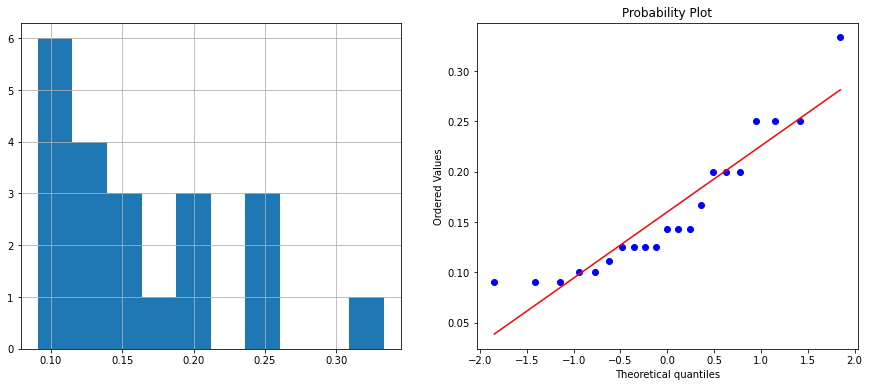

In [51]:
diagnostic_plot(delivary_data,"recp_ST")

The reciprical transformed  distribution not done a good job in making Sorting Time variable look Gaussian Distributed

In [52]:
lin_reg_model2=smf.ols(formula="DT~recp_ST",data=delivary_data).fit()

In [53]:
lin_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     38.75
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           5.59e-06
Time:                        17:38:26   Log-Likelihood:                -51.724
No. Observations:                  21   AIC:                             107.4
Df Residuals:                      19   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7754      1.731     15.465      0.000      23.152      30.399
recp_ST      -62.3579     10.018     -6.225      0.000     -83.326     -41.390
==============================================================================
Omnibus:                        6.838   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.450
Skew:                           1.026   Prob(JB):                        0.108
Kurtosis:                       3.936   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sqaure Root Tansformation

In [54]:
delivary_data['sqrt_ST']=delivary_data['ST']**(1/2)

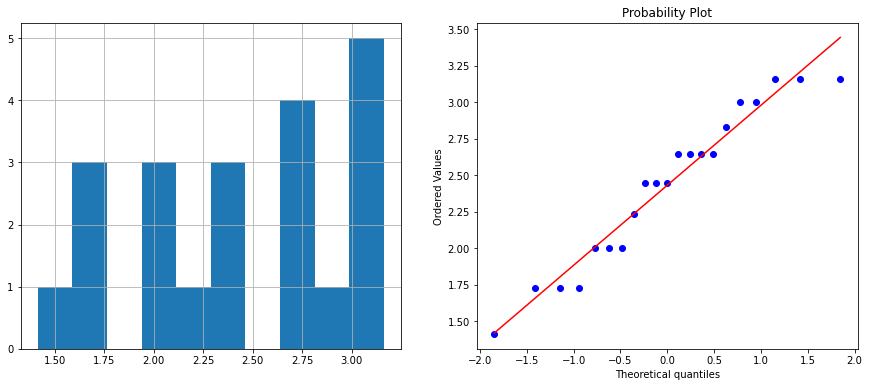

In [55]:
diagnostic_plot(delivary_data,"sqrt_ST")

The sqrt transformed  distribution not done a good job in making Sorting Time variable look Gaussian Distributed

In [56]:
lin_reg_model3=smf.ols(formula="DT~sqrt_ST",data=delivary_data).fit()

In [57]:
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.61e-06
Time:                        17:38:27   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_ST        7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BoxCox

Optimal lambda:  0.6880660292932914


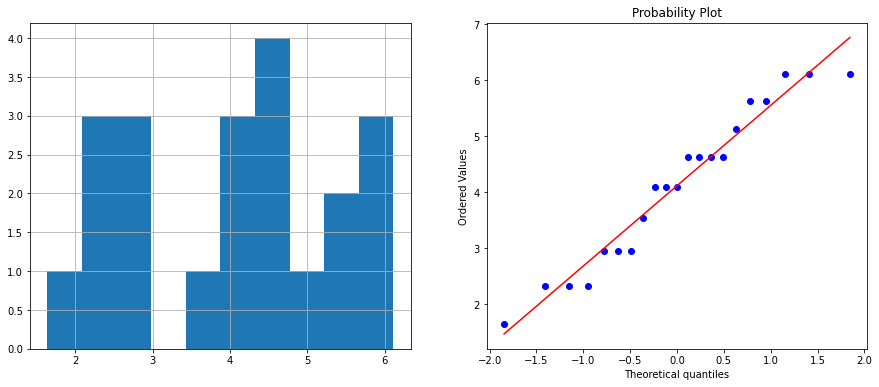

In [58]:
delivary_data['box_cox_ST'], param = stats.boxcox(delivary_data.ST+1) # we can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plot(delivary_data, 'box_cox_ST')

In [59]:
lin_reg_model4=smf.ols(formula="DT~box_cox_ST",data=delivary_data).fit()

In [60]:
lin_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     42.42
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.07e-06
Time:                        17:38:27   Log-Likelihood:                -51.075
No. Observations:                  21   AIC:                             106.2
Df Residuals:                      19   BIC:                             108.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3391      2.013      2.155      0.044       0.125       8.553
box_cox_ST     3.0236      0.464      6.513      0.000       2.052       3.995
==============================================================================
Omnibus:                        4.210   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.494
Skew:                           0.817   Prob(JB):                        0.287
Kurtosis:                       3.428   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
#### amog all the models  we can choose the lin_reg_model1 because it has more r squared value and also low AIC and BIC values

## Model Evaluation


In [62]:
pred=lin_reg_model.predict

In [63]:
pred

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x000001B8EF907340>>